In [93]:
from stable_baselines.gail import DataLoader
from stable_baselines.gail import ExpertDataset

# Read Exper data
df = pd.read_table(
    'mountain_car_demo.txt',
    sep=' ',
    header=0,
    names=['pos', 'vel', 'action', 'reward'],
    skiprows=1,
    index_col=False
)

# FOrmat expert data in usable way
expert = DataLoader(
    df.reset_index().index.to_numpy(),
    df.drop(['action', 'reward'], axis=1).to_numpy(),
    df.action.to_numpy(),
    100
)

In [96]:
expert.actions

array([0., 0., 0., ..., 2., 2., 2.])

In [139]:
import gym

from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import DQN

# Make openai-gym enviroment
env = gym.make('MountainCar-v0')

# DQN model
model = DQN(MlpPolicy, env, verbose=False, learning_rate=0.001)



In [165]:
model.learn(total_timesteps=25000)

In [166]:
import numpy as np
trajectories = np.empty((6,), dtype=object)
trajectories.shape
for i in range(6):
    trajectory = []
    obs = env.reset()
    done = False  
    while not done:
        action, _states = model.predict(obs)
        trajectory.append([ob for ob in obs] + [action])
        obs, reward, done, info = env.step(action)
    
    trajectories[i] = np.array(trajectory)


In [167]:
import pandas as pd

In [168]:
data = pd.DataFrame(np.vstack([traj for traj in trajectories]), columns=['position', 'velocity', 'action'])

In [169]:
data

,position,velocity,action
0,-0.468225,0.000000,0.0
1,-0.469638,-0.001413,0.0
2,-0.472454,-0.002816,0.0
3,-0.476653,-0.004198,0.0
4,-0.482202,-0.005549,0.0
...,...,...,...
778,0.290786,0.049769,2.0
779,0.339947,0.049162,2.0
780,0.388800,0.048853,2.0
781,0.437669,0.048869,2.0


In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

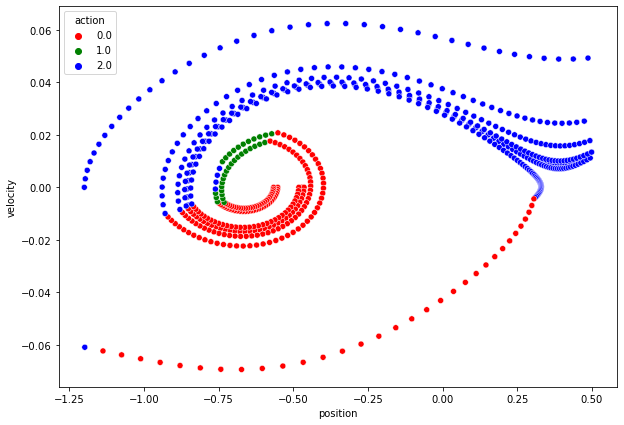

In [171]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.scatterplot(x=data.position, y=data.velocity, hue=data.action, palette=['red', 'green', 'blue'])

In [172]:
model.learn

<bound method DQN.learn of <stable_baselines.deepq.dqn.DQN object at 0x7f9210acc050>>